<a href="https://colab.research.google.com/github/ojas2412/SIHrepo/blob/main/SoilMoistureAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

In [4]:
import pandas as pd
import seaborn as sb
import sklearn as sk
import numpy as np
import tensorflow as tf

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [6]:
#Importing and displaying the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SIH/soilmoisture.csv')
dataset.head()

,Time,Air Temperature,Air Humidity,Rainfall Indicator,Soil Moisture
0,10:00:00,23,42.8,0,10.2
1,10:00:30,23,42.8,0,10.0
2,10:01:00,23,42.8,0,9.8
3,10:01:30,23,42.8,0,10.0
4,10:02:00,23,42.9,0,10.1


In [7]:
#Viewing size of dataset
dataset.shape

(101, 5)

<Axes: xlabel='Time', ylabel='Soil Moisture '>

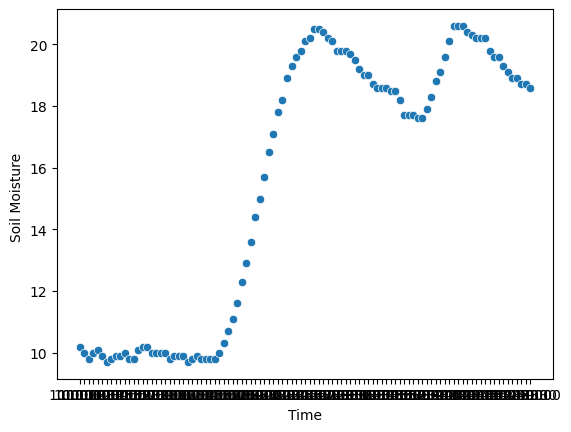

In [8]:
#Generating scatter plots to view data distribution
sb.scatterplot(x = dataset['Time'] , y = dataset['Soil Moisture '])

<Axes: xlabel='Air Humidity ', ylabel='Soil Moisture '>

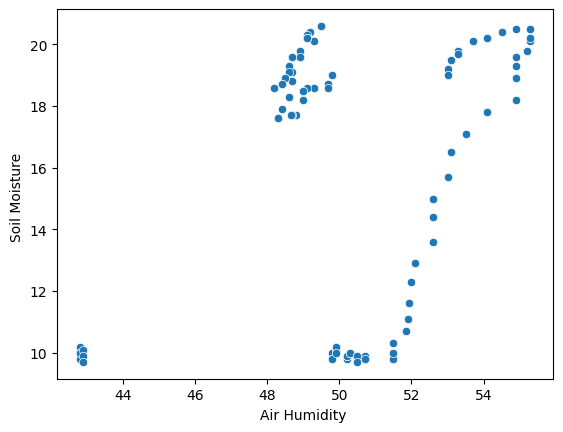

In [9]:
#An example of how data plots are misleading. We must consider time series here, else we just get a plot of how humidity values are present at different soil moisture intervals. The time consideration of how the environment arrived at the humidity level is to be considered.
sb.scatterplot(x=dataset['Air Humidity '],y=dataset['Soil Moisture '])

In [10]:
#The data visualization shows

In [15]:
# Split the data into features (X) and target (y)
X = dataset[['Air Temperature ', 'Air Humidity ', 'Rainfall Indicator ']]
y = dataset['Soil Moisture ']

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Training the Linear Regression Model

# Initializing
lr_model = LinearRegression()

# Model training
lr_model.fit(X_train, y_train)

# Predict using test data
lr_predictions = lr_model.predict(X_test)

In [17]:
#Training the XGBoost Model

# Initializing
xgb_model = XGBRegressor()

# Training
xgb_model.fit(X_train, y_train)

# Predict using test set
xgb_predictions = xgb_model.predict(X_test)

In [18]:
#Training Neural Network

# Initializing
nn_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Training
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

In [19]:
# Calculating RMSE for Linear Regression
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

print(f'Linear Regression RMSE: {lr_rmse}')

# Calculating RMSE for XGBoost
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

print(f'XGBoost RMSE: {xgb_rmse}')

# Evaluating Neural Meet
nn_rmse = nn_model.evaluate(X_test, y_test, verbose=0)

print(f'Neural Network RMSE: {nn_rmse**0.5}')

Linear Regression RMSE: 3.951687764820204
XGBoost RMSE: 0.5411980655064746
Neural Network RMSE: 4.178054861480054


In [20]:
#We can see that XGBoost is able to grasp the relationship well